In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import csv
from datetime import date, timedelta
%matplotlib inline

In [47]:
#This cell flattens calendar table to grid of prices
#It takes input calendar.csv and outputs to a file calendar_grid.csv
#You should only need to run it once to generate the calendar_grid.csv file
def transform_price(price_string):
    if price_string == "":
        return ""
    elif len(price_string) > 3 and price_string[0] == "$" and price_string[-3:] == ".00":
        return price_string[1:-3].replace(",", "")
    elif len(price_string) > 1 and price_string[0] == "$":
        return price_string[1:].replace(",", "")
    else:
        raise ValueError("Cannot parse price " + price_string)

start_date = date(2015, 1, 1)
dates = [str(start_date + timedelta(days=i))[5:] for i in xrange(365)]

with open("calendar.csv", "rU") as original_data, open("calendar_grid.csv", "w") as new_data:
    #create reader for data
    reader = csv.DictReader(original_data)

    #create writer
    writer = csv.DictWriter(new_data, ["listing_id"] + dates)
    writer.writeheader()

    new_row = None
    current_listing_id = None
    for row in reader:
        if current_listing_id != row["listing_id"]:
            #write previous row
            if new_row is not None:
                writer.writerow(new_row)
            #setup new row
            current_listing_id = row["listing_id"]
            new_row = {"listing_id": current_listing_id}
        #add date entry
        new_row[row["date"][5:]] = transform_price(row["price"])
    #write final row
    writer.writerow(new_row)

In [2]:
#read data
data = pd.read_csv("calendar_grid.csv")
print data.shape
data.head(n=20)

(27392, 366)


,listing_id,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
0,3604481,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,...,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
1,2949128,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,4325397,100.0,100.0,100.0,100.0,100.0,70.0,70.0,70.0,80.0,...,70.0,70.0,70.0,80.0,80.0,70.0,70.0,70.0,70.0,70.0
3,4325398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0
4,3426149,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,...,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0
5,65562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0
6,2730672,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
7,4587554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
8,819206,NaN,NaN,NaN,70.0,70.0,70.0,70.0,70.0,70.0,...,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
9,4849703,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#get data as numpy array
prices = data.values[:,1:]
print "price shape", prices.shape
#get weekends (1/3 is a Saturday)
weekend_index = [i for i in range(1, 366) if i % 7 == 3 or i % 7 == 4]
weekday_index = [i for i in range(1, 366) if i % 7 < 3 or i % 7 > 4]
weekends = data.values[:, weekend_index]
weekdays = data.values[:, weekday_index]
print "weekends shape", weekends.shape
print "weekdays shape", weekdays.shape

price shape (27392, 365)
weekends shape (27392, 104)
weekdays shape (27392, 261)


In [4]:
#average prices ignoring nan
weekend_prices = np.nanmean(weekends, axis=1)
weekday_prices = np.nanmean(weekdays, axis=1)
weekend_diff = weekend_prices - weekday_prices
weekend_ratio = weekend_prices / weekday_prices
print "Weekends vs Weekdays"
print "Difference", np.nanmean(weekend_diff)
print "Ratio", np.nanmean(weekend_ratio)

Weekends vs Weekdays
Difference 1.18763340897
Ratio 1.00896469992


/usr/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Non-NaN Count (26348,)
Outliers High [  2.38410596   1.47349177   1.49783282   1.5          1.40753876
   2.45295968   1.45084286   1.54728215   1.5932618    1.61599784
   1.67307692   1.65539112   1.92307692   1.44678492   1.51785714
   1.51367026   1.73770942   1.5239705    1.5770874    1.60406361
   1.54696133  10.98888889   1.42020794]
Outliers Low []


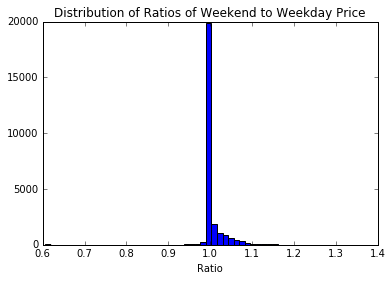

In [8]:
#plot ratios
#filter out nan, clip plot between 0.6 and 1.4
adj_ratio = weekend_ratio[~np.isnan(weekend_ratio)]
print "Non-NaN Count", adj_ratio.shape
print "Outliers High", adj_ratio[adj_ratio > 1.4]
print "Outliers Low", adj_ratio[adj_ratio < 0.6]
adj_ratio[adj_ratio > 1.4] = 1.4
adj_ratio[adj_ratio < 0.6] = 0.6
plt.hist(adj_ratio, bins=60)
plt.title("Distribution of Ratios of Weekend to Weekday Price")
plt.xlabel("Ratio");

In [22]:
#holiday indices
holiday_dates = ['01-01', '07-04', '11-26', '12-25']
holiday_index = [data.columns.get_loc(x) for x in holiday_dates]
nonholiday_index = [i for i in range(1, 366) if i not in holiday_index]

#get holiday averages
holidays = data.values[:, holiday_index]
nonholidays = data.values[:, nonholiday_index]
holiday_prices = np.nanmean(holidays, axis=1)
nonholiday_prices = np.nanmean(nonholidays, axis=1)
holiday_diff = holiday_prices - nonholiday_prices
holiday_ratio = holiday_prices / nonholiday_prices
print "Holidays vs Non-Holidays"
print "Difference", np.nanmean(holiday_diff)
print "Ratio", np.nanmean(holiday_ratio)

Holidays vs Non-Holidays
Difference 1.90022241356
Ratio 1.01240334307


Non-NaN Count (24932,)
Outliers High [ 1.63949275  1.46141059  1.42851615  1.64794007  1.55913233  2.07436278
  1.56933077  1.50284253  1.46309883  1.4895593   1.54524055  1.625
  1.43462281  1.58137884  1.4838405   1.60046702  1.42809747  1.57052225
  1.52830189  1.57862276  1.64985807  1.65711557  1.54984051  1.73604979
  1.4017425   1.6         2.8574547   1.440044    1.44736842  1.59129727
  1.43680802  1.70082052  1.92929793  1.49770208  1.63822658  2.72090147
  1.43435305  1.5609165   1.6323873   1.42810776  1.551136    1.43237399
  1.43530079  1.44854586  1.45637726  2.          1.61691881  1.46666667
  1.51300494  1.51796627  1.54704273  1.44400094  1.56347288  1.5240624
  1.6352459   1.83540036  1.56558888  1.47187134  1.47776949  1.41207273
  1.56591553  1.51162791  1.46096162  2.33693189  1.43076923  1.56248762
  1.40206186  1.41524077  1.71250551  1.56902655  1.47587827  1.80994303
  1.45880493  1.45887311  1.59878877  1.44255486  1.65085271  1.59210857
  1.62033713  1.5818

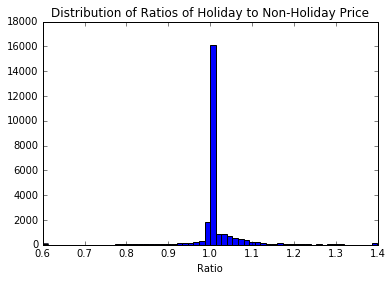

In [23]:
#plot ratios
#filter out nan, clip plot between 0.6 and 1.4
adj_ratio = holiday_ratio[~np.isnan(holiday_ratio)]
print "Non-NaN Count", adj_ratio.shape
print "Outliers High", adj_ratio[adj_ratio > 1.4]
print "Outliers Low", adj_ratio[adj_ratio < 0.6]
adj_ratio[adj_ratio > 1.4] = 1.4
adj_ratio[adj_ratio < 0.6] = 0.6
plt.hist(adj_ratio, bins=60)
plt.title("Distribution of Ratios of Holiday to Non-Holiday Price")
plt.xlabel("Ratio");